# Determining a Wine's Cultivar

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


Read the Wine dataset.

In [22]:
df = pd.read_csv('../../dataset/wine.csv')

df

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Extract our features.

In [23]:
df_features = df.loc[:, 'Alcohol':]

df_features

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
df_label = df[['Cultivar']]

df_label

,Cultivar
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [25]:
df_label.values

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

Split the data for training and testing.

In [26]:

y = df.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(
	df_features.values, df_label.values, test_size=0.1, stratify=y)


Appy standardization to our features.

In [27]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


Appy PCA for dimension reduction.

In [28]:
pca = PCA(n_components=5)
pca.fit(x_train)

print('explained variance: ', pca.explained_variance_ratio_)
print('explained variance: ', pca.explained_variance_ratio_.sum())

explained variance:  [0.36302092 0.19152175 0.11522132 0.06902175 0.06354606]
explained variance:  0.802331812693907


Transform both our Training and Test data using the fitted PCA model.

In [29]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)


Re-label our labels to start from 0 (required by to_categorical() function).

In [30]:
le = LabelEncoder()
le.fit(y)

le.classes_

array([1, 2, 3])

Print our labels into encoded categorical numbers.

In [31]:
y_train_le = le.transform(y_train)
y_test_le = le.transform(y_test)

print(y_train_le)
print(y_test_le)

[2 0 2 1 0 1 2 0 2 0 0 2 2 0 0 2 2 2 2 2 1 2 0 1 0 0 0 0 0 0 1 0 2 0 1 2 2
 2 1 0 1 0 0 2 0 0 0 1 0 2 2 1 1 1 1 1 1 1 1 2 1 0 2 2 1 1 0 2 1 2 0 1 1 0
 0 1 1 1 1 2 1 0 2 1 0 0 1 2 2 1 0 0 2 1 2 2 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0
 2 0 0 1 1 1 1 0 1 2 2 1 1 1 0 1 2 1 0 0 2 0 2 1 1 1 1 1 0 2 0 1 0 1 1 1 2
 1 1 1 1 0 2 2 0 1 0 2 2]
[2 1 0 2 1 1 0 0 1 0 1 2 1 0 0 2 1 2]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Perform One-Hot Encoding on our categorical numbers.

In [32]:
y_train_1hot = tf.keras.utils.to_categorical(y_train_le, 3)
y_test_1hot = tf.keras.utils.to_categorical(y_test_le, 3)

print(y_train_1hot)
print(y_test_1hot)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

Create the model.

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(x_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Training the model.

In [34]:
history = model.fit(x_train, y_train_1hot, epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 3ms/step - loss: 1.3106 - accuracy: 0.1063
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 1.1716 - accuracy: 0.2000
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0490 - accuracy: 0.3063
Epoch 4/300
5/5 [==============================] - 0s 3ms/step - loss: 0.9373 - accuracy: 0.6000
Epoch 5/300
5/5 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.7875
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 0.7470 - accuracy: 0.8625
Epoch 7/300
5/5 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.9000
Epoch 8/300
5/5 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.9250
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.9375
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.9438
Epoch 11/300
5/5 [===========

Plot our "loss" and "accuracy" graphs.

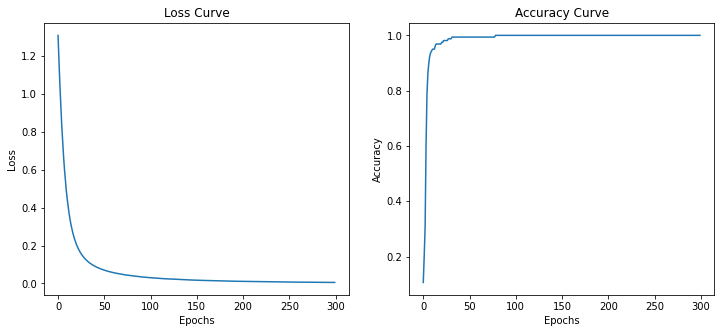

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(history.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(history.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

Perform auto evaluation.

In [36]:
loss, accuracy = model.evaluate(x=x_test, y=y_test_1hot)

print('loss = ', loss)
print('accuracy = ', accuracy)

1/1 [==============================] - 0s 124ms/step - loss: 0.0032 - accuracy: 1.0000
loss =  0.003180605825036764
accuracy =  1.0


Eye-ball predicted values vs actual values.

In [37]:
predictions = model.predict(x=x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test_1hot[i], 'Predicted: ', predictions[i])

Actual:  [0. 0. 1.] Predicted:  [8.9204323e-06 5.6174301e-08 9.9999106e-01]
Actual:  [0. 1. 0.] Predicted:  [1.0539181e-08 1.0000000e+00 4.0870574e-08]
Actual:  [1. 0. 0.] Predicted:  [9.9949992e-01 3.7855943e-04 1.2149668e-04]
Actual:  [0. 0. 1.] Predicted:  [5.8472287e-06 1.2320138e-06 9.9999297e-01]
Actual:  [0. 1. 0.] Predicted:  [3.6910498e-03 9.9583250e-01 4.7649010e-04]
Actual:  [0. 1. 0.] Predicted:  [1.5343769e-05 9.9990523e-01 7.9343561e-05]
Actual:  [1. 0. 0.] Predicted:  [9.9997282e-01 5.9586773e-06 2.1166425e-05]
Actual:  [1. 0. 0.] Predicted:  [9.9999976e-01 2.3573163e-09 2.3004640e-07]
Actual:  [0. 1. 0.] Predicted:  [2.8646308e-10 1.0000000e+00 3.6140563e-10]
Actual:  [1. 0. 0.] Predicted:  [9.9998391e-01 4.9063315e-06 1.1198086e-05]
Actual:  [0. 1. 0.] Predicted:  [4.6741959e-02 9.5321929e-01 3.8697326e-05]
Actual:  [0. 0. 1.] Predicted:  [3.7841412e-05 4.0873657e-03 9.9587482e-01]
Actual:  [0. 1. 0.] Predicted:  [3.9092672e-08 9.9999833e-01 1.6467069e-06]
Actual:  [1.

Perform manual calculation for accuracy in predictions.

In [38]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test_1hot[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct: {0}, wrong: {1}'.format(correct, wrong))
print('accuracy =', correct/n_preds)


correct: 18, wrong: 0
accuracy = 1.0
